# Quality prediction of white wine

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [19]:
white_wine_original= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [20]:
white_wine=white_wine_original.copy()
white_wine_heatmap=white_wine_original.copy()

# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: '0low'
if value <= 5 else '1medium'
if value <= 7 else '2high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['0low', '1medium', '2high'])


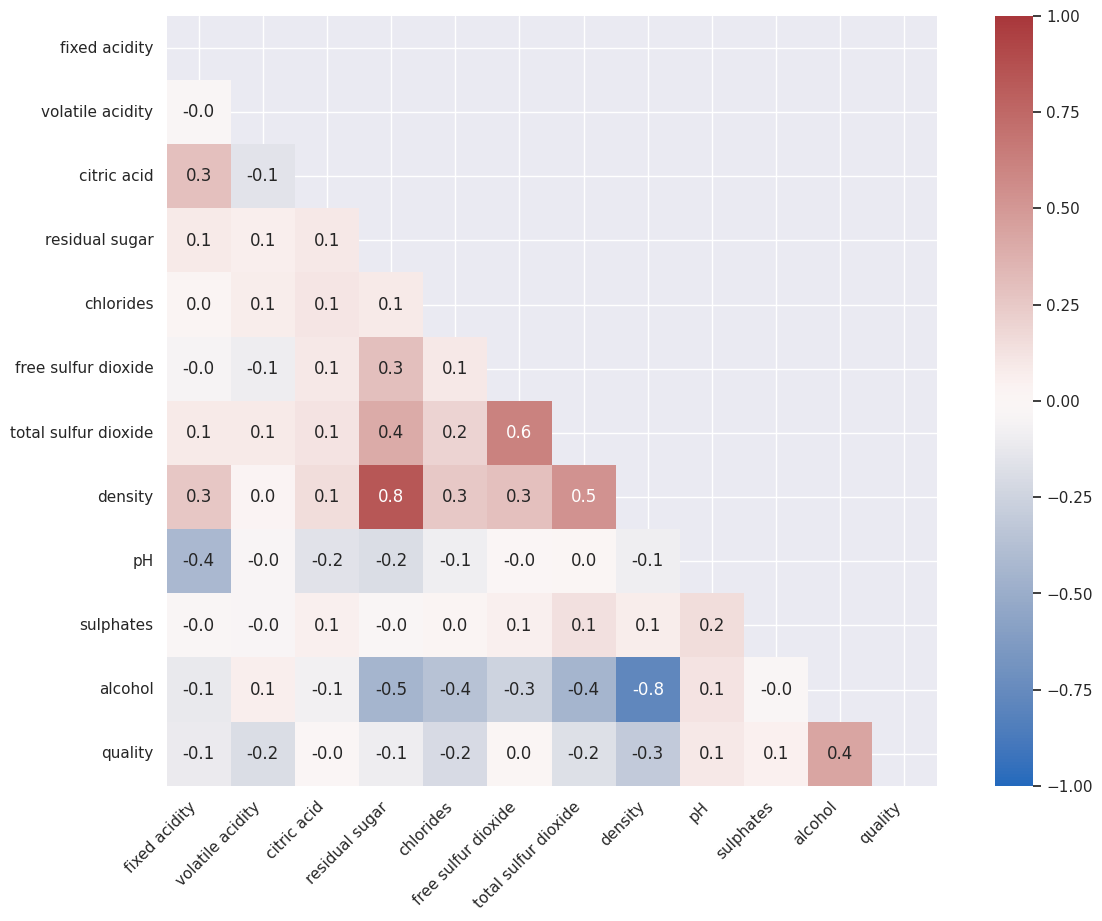

In [21]:
wines_mx=white_wine_heatmap.corr()


# creating mask
mask = np.triu(np.ones_like(wines_mx))


ax=sns.heatmap(
    wines_mx,
    annot=True,fmt=".1f",
    square=True,
    mask=mask,
    cmap='vlag',
    vmin = -1,
    vmax = 1
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc = {'figure.figsize':(15,10)})

In [22]:
from sklearn.preprocessing import LabelEncoder

#cheque for unique values in quality_label column

white_wine['quality_label'].unique()


le = LabelEncoder()


le.fit(white_wine[['quality_label']])

print(le.classes_)

df_transformed_quality=pd.DataFrame(le.transform(white_wine[['quality_label']]))

#print(df_transformed_quality)

enc_wines_ml=white_wine.copy()

#print(enc_wines_ml2['quality_label'])

#replace quality label with encoded values
enc_wines_ml['quality_label']=df_transformed_quality

le.inverse_transform([0,0, 1, 2])
le.transform(["0low", "0low", "1medium"])



enc_wines_ml.head()

['0low' '1medium' '2high']


/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [ ]:
enc_wines_ml=enc_wines_ml.drop(columns=['quality', 'citric acid'])
#, 'total sulfur dioxide', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'fixed acidity'
enc_wines_ml.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.701919
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.531776
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,2.000000


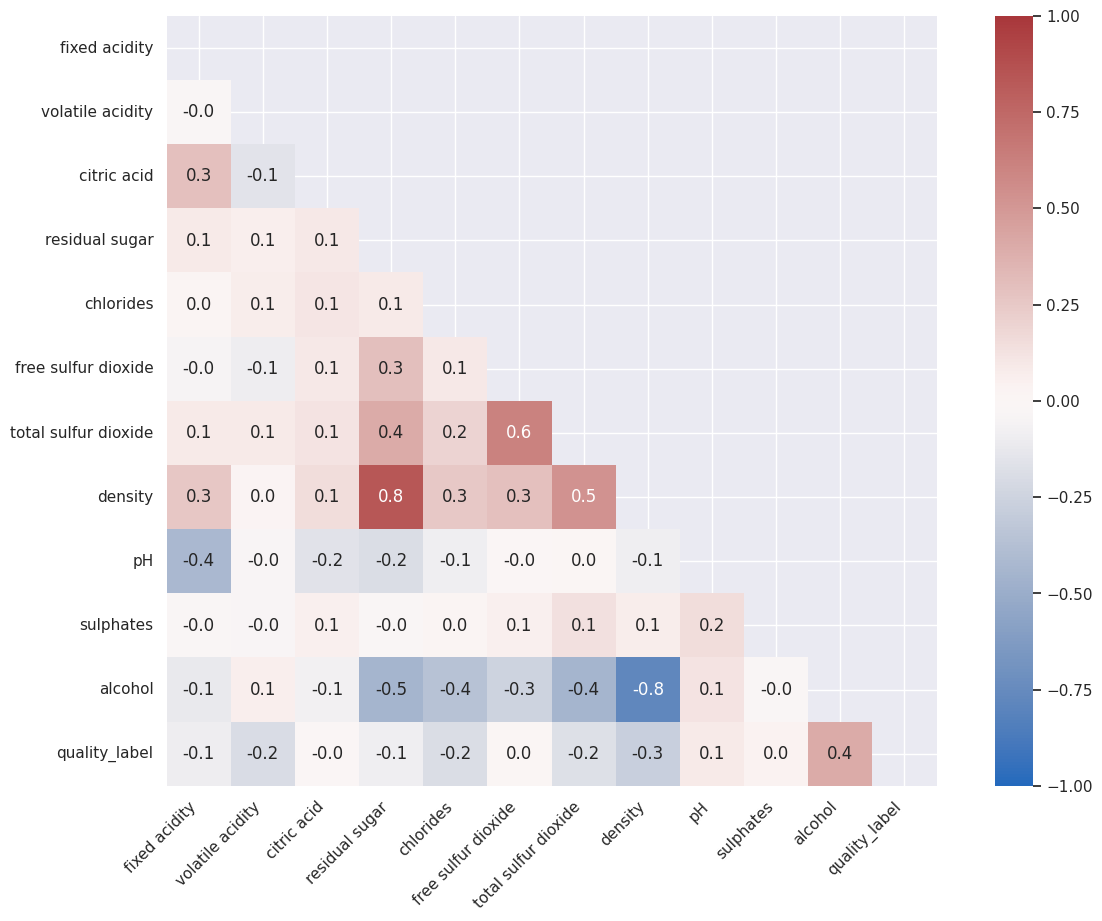

In [ ]:
wines_mx=enc_wines_ml.corr()


# creating mask
mask = np.triu(np.ones_like(wines_mx))


ax=sns.heatmap(
    wines_mx,
    annot=True,fmt=".1f",
    square=True,
    mask=mask,
    cmap='vlag',
    vmin = -1,
    vmax = 1
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc = {'figure.figsize':(15,10)})

In [ ]:
from sklearn.model_selection import train_test_split

X=enc_wines_ml.copy()


# Example:
y=enc_wines_ml[['quality_label']]
X.drop(['quality_label'],axis=1,inplace=True)


#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [ ]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (3918, 11)
y_train (3918, 1)
X_test (980, 11)
y_test (980, 1)


In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

def accuracy_compare(X_train, X_test, y_train, y_test):
    lr = LogisticRegression()
    lr.fit(X_train, y_train.values.ravel())
    pred_lr = lr.predict(X_test)
    print("\033[96m Logistic Regression: \033[0m", np.round(accuracy_score(y_test, pred_lr)*100, 2), '%')
    tree= DecisionTreeClassifier(max_depth=1, random_state=42)
    tree=tree.fit(X_train, y_train)
    pred_tree = tree.predict(X_test) 
    print("\033[96m Decision Tree Classifier: \033[0m", np.round(accuracy_score(y_test, pred_tree)*100, 2), '%')
    cla = AdaBoostClassifier(estimator=tree, n_estimators=100, random_state=42, learning_rate=0.5)
    cla.fit(X_train, y_train.values.ravel())
    pred_ada = cla.predict(X_test)
    print("\033[96m AdaBoost Classifier: \033[0m", np.round(accuracy_score(y_test, pred_ada)*100, 2), '%')
    clr = RandomForestClassifier(max_depth=2, random_state=0)
    clr.fit(X_train, y_train.values.ravel())
    pred_rnd = clr.predict(X_test)
    print("\033[96m Random Forest Classifier: \033[0m", np.round(accuracy_score(y_test, pred_rnd)*100, 2), '%')
    clf = SVC(kernel = 'linear').fit(X_train,y_train.values.ravel())
    clf.predict(X_train)
    pred_svc = clf.predict(X_test)
    print("\033[96m Support Vector classifier: \033[0m", np.round(accuracy_score(y_test, pred_svc)*100, 2), '%')
    gnb = GaussianNB()
    pred_gnb = gnb.fit(X_train, y_train.values.ravel()).predict(X_test)
    print("\033[96m Gaussian Naive Bayes: \033[0m", np.round(accuracy_score(y_test, pred_gnb)*100, 2), '%')
    clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train.values.ravel())
    pred_nn=clf.predict(X_test)
    print("\033[96m KNN: \033[0m", np.round(accuracy_score(y_test, pred_nn)*100, 2), '%')
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train.values.ravel())
    pred_knn=neigh.predict(X_test)
    print("\033[96m Neural Networks: \033[0m", np.round(accuracy_score(y_test, pred_knn)*100, 2), '%')
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    gb.fit(X_train, y_train.values.ravel())
    pred_gb = gb.predict(X_test)
    print("\033[96m Gradient Boosting: \033[0m", np.round(accuracy_score(y_test, pred_gb)*100, 2), '%')
    
    
    
    

accuracy_compare(X_train, X_test, y_train, y_test)

/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Logistic Regression:  66.33 %
 Decision Tree Classifier:  62.86 %
 AdaBoost Classifier:  69.8 %
 Random Forest Classifier:  69.49 %
 Support Vector classifier:  70.71 %
 Gaussian Naive Bayes:  67.35 %
 KNN:  71.53 %
 Neural Networks:  64.59 %
 Gradient Boosting:  73.06 %


In [ ]:

from sklearn.metrics import cohen_kappa_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

def accuracy_compare(X_train, X_test, y_train, y_test):
    lr = LogisticRegression()
    lr.fit(X_train, y_train.values.ravel())
    pred_lr = lr.predict(X_test)
    print("\033[96m Logistic Regression: \033[0m", np.round(cohen_kappa_score(y_test, pred_lr)*100, 2), '%')
    tree= DecisionTreeClassifier(max_depth=1, random_state=42)
    tree=tree.fit(X_train, y_train)
    pred_tree = tree.predict(X_test) 
    print("\033[96m Decision Tree Classifier: \033[0m", np.round(cohen_kappa_score(y_test, pred_tree)*100, 2), '%')
    cla = AdaBoostClassifier(estimator=tree, n_estimators=100, random_state=42, learning_rate=0.5)
    cla.fit(X_train, y_train.values.ravel())
    pred_ada = cla.predict(X_test)
    print("\033[96m AdaBoost Classifier: \033[0m", np.round(cohen_kappa_score(y_test, pred_ada)*100, 2), '%')
    clr = RandomForestClassifier(max_depth=2, random_state=0)
    clr.fit(X_train, y_train.values.ravel())
    pred_rnd = clr.predict(X_test)
    print("\033[96m Random Forest Classifier: \033[0m", np.round(cohen_kappa_score(y_test, pred_rnd)*100, 2), '%')
    clf = SVC(kernel = 'linear').fit(X_train,y_train.values.ravel())
    clf.predict(X_train)
    pred_svc = clf.predict(X_test)
    print("\033[96m Support Vector classifier: \033[0m", np.round(cohen_kappa_score(y_test, pred_svc)*100, 2), '%')
    gnb = GaussianNB()
    pred_gnb = gnb.fit(X_train, y_train.values.ravel()).predict(X_test)
    print("\033[96m Gaussian Naive Bayes: \033[0m", np.round(cohen_kappa_score(y_test, pred_gnb)*100, 2), '%')
    clf = MLPClassifier(random_state=1, max_iter=3000).fit(X_train, y_train.values.ravel())
    pred_nn=clf.predict(X_test)
    print("\033[96m Neural Networks: \033[0m", np.round(cohen_kappa_score(y_test, pred_nn)*100, 2), '%')
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train.values.ravel())
    pred_knn=neigh.predict(X_test)
    print("\033[96m KNN: \033[0m", np.round(cohen_kappa_score(y_test, pred_knn)*100, 2), '%')
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    gb.fit(X_train, y_train.values.ravel())
    pred_gb = gb.predict(X_test)
    print("\033[96m Gradient Boosting: \033[0m", np.round(cohen_kappa_score(y_test, pred_gb)*100, 2), '%')
    
    
    
    

accuracy_compare(X_train, X_test, y_train, y_test)

/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Logistic Regression:  24.16 %
 Decision Tree Classifier:  0.0 %
 AdaBoost Classifier:  32.88 %
 Random Forest Classifier:  25.5 %
 Support Vector classifier:  33.55 %
 Gaussian Naive Bayes:  31.86 %
 Neural Networks:  39.05 %
 KNN:  25.26 %
 Gradient Boosting:  41.88 %


In [38]:
from sklearn.model_selection import GridSearchCV

n_estimators_range = np.arange(10,210,10)
max_depth_range = np.arange(1,6,1)
weights = ['uniform', 'distance']
param_grid = dict(n_estimators=n_estimators_range, max_depth=max_depth_range)

gb = GradientBoostingClassifier(learning_rate=1.0, random_state=0)


grid = GridSearchCV(estimator=gb, param_grid=param_grid,)

grid.fit(X_train, y_train.values.ravel())

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [ ]:
from sklearn.model_selection import GridSearchCV

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train.values.ravel())

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 4, 'n_estimators': 200} with a score of 0.81


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

def evaluate (y_test, pred_lr, target_names):
    print(" \033[95m \033[1m Confusion matrix: \033[0m")
    cm=confusion_matrix(y_test, pred_lr)
    print(cm, '\n\n')
    print("\033[95m \033[1m Accuracy score: \033[0m", np.round(accuracy_score(y_test, pred_lr)*100, 2), '%\n\n')
    print("\033[95m \033[1m Classification report: \033[0m \n",classification_report(y_test, pred_lr, target_names=target_names), '\n\n')
    kappa = cohen_kappa_score(pred_lr, y_test)
    print("\033[95m \033[1m Cohen-Kappa score: \033[0m", kappa)
    

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clr = RandomForestClassifier(n_estimators=200, max_features=4)
clr.fit(X_train, y_train.values.ravel())
pred_rnd = clr.predict(X_test)

evaluate(y_test, pred_rnd,["0low","1medium", "2high"])

   Confusion matrix: 
[[235  93   0]
 [ 73 541   2]
 [  0  24  12]] 


  Accuracy score:  80.41 %


  Classification report:  
               precision    recall  f1-score   support

        0low       0.76      0.72      0.74       328
     1medium       0.82      0.88      0.85       616
       2high       0.86      0.33      0.48        36

    accuracy                           0.80       980
   macro avg       0.81      0.64      0.69       980
weighted avg       0.80      0.80      0.80       980
 


  Cohen-Kappa score:  0.5851339671564391


In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train.values.ravel())
pred_gb = gb.predict(X_test)


evaluate(y_test, pred_gb,["0low","1medium", "2high"])

   Confusion matrix: 
[[164 162   2]
 [144 465   7]
 [  7  25   4]] 


  Accuracy score:  64.59 %


  Classification report:  
               precision    recall  f1-score   support

        0low       0.52      0.50      0.51       328
     1medium       0.71      0.75      0.73       616
       2high       0.31      0.11      0.16        36

    accuracy                           0.65       980
   macro avg       0.51      0.46      0.47       980
weighted avg       0.63      0.65      0.64       980
 


  Cohen-Kappa score:  0.2525825311002682


In [ ]:
from sklearn.linear_model import LogisticRegression


# Fit the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
pred_lr

evaluate(y_test, pred_lr,["0low","1medium", "2high"])

   Confusion matrix: 
[[137 191   0]
 [103 513   0]
 [  2  34   0]] 


  Accuracy score:  66.33 %


  Classification report:  
               precision    recall  f1-score   support

        0low       0.57      0.42      0.48       328
     1medium       0.70      0.83      0.76       616
       2high       0.00      0.00      0.00        36

    accuracy                           0.66       980
   macro avg       0.42      0.42      0.41       980
weighted avg       0.63      0.66      0.64       980
 


  Cohen-Kappa score:  0.24158568158793292


/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict(X_test)

evaluate(y_test, pred_lr,["0low","1medium", "2high"])

/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Confusion matrix: 
[[137 191   0]
 [103 513   0]
 [  2  34   0]] 


  Accuracy score:  66.33 %


  Classification report:  
               precision    recall  f1-score   support

        0low       0.57      0.42      0.48       328
     1medium       0.70      0.83      0.76       616
       2high       0.00      0.00      0.00        36

    accuracy                           0.66       980
   macro avg       0.42      0.42      0.41       980
weighted avg       0.63      0.66      0.64       980
 


  Cohen-Kappa score:  0.24158568158793292


/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
